In [2]:
import os
os.listdir("/content/drive/MyDrive/")

['Colab Notebooks', 'coco2017_subset.zip', 'coco2017_preprocessed']

# **Task 1: Performing EDA for the COCO2017 dataset**

In [ ]:
!unzip /content/drive/MyDrive/coco2017_subset.zip -d /content/extracted_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508972.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508984.jpg  
  inflating: /content/extracted_file

In [ ]:
import os #for handling file operations
from pycocotools.coco import COCO #to load coco annotations
import matplotlib.pyplot as plt #to visualize the results
import matplotlib.patches as patches #Draws bounding boxes
import cv2 #Loads and processes images

In [ ]:
ANNOTATION_FILE = '/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json'
#Contain metadata like bounding boxes, segmentation masks, and object categories for trainig images.
IMAGE_FOLDER = '/content/extracted_files/coco2017_subset/train2017'
#the actual image folder

In [ ]:
# Initialize COCO API for instance annotations
#Loads COCO annotations from the given JSON file.
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=6.30s)
creating index...
index created!


In [ ]:
import seaborn as sns #Provides beautiful statistical visualizations.
import numpy as np #Useful for handling numerical operations.
import random #Used to pick a random image for visualization.

In [ ]:
categories=coco.loadCats(coco.getCatIds())#Retrieve all category metadata
category_names=[cat['name'] for cat in categories]
annotations=coco.dataset['annotations'] #Extracts all annotations (bounding boxes, masks category ids, etc.).
images=coco.dataset['images'] #Extracts all image metadata (file names, IDs, etc.)

In [ ]:
#basic dataset statistics
print(f"Total categories:{len(categories)}")
print(f"Total images:{len(images)}")
print(f"Total annotations:{len(annotations)}")

Total categories:80
Total images:29571
Total annotations:212806


In [ ]:
#compute category distribution - counting occurrences if each category
#how many times a category has appeared in the annotations
category_counts={}
for ann in annotations:
  cat_id=ann['category_id']
  category_counts[cat_id]=category_counts.get(cat_id,0)+1;
print(category_counts)

{18: 1409, 64: 2097, 72: 1466, 16: 2839, 17: 1227, 19: 1677, 20: 2168, 21: 1855, 44: 5780, 63: 1453, 62: 9703, 67: 3759, 2: 1731, 3: 10945, 4: 2105, 5: 1369, 6: 1449, 7: 1136, 9: 2815, 1: 65165, 13: 522, 28: 2708, 32: 1618, 37: 1590, 65: 1077, 77: 1624, 82: 668, 85: 1585, 90: 473, 8: 2649, 10: 2982, 11: 480, 14: 291, 15: 2398, 22: 1348, 25: 1311, 34: 724, 35: 1701, 36: 709, 38: 2239, 41: 1399, 42: 1507, 43: 1245, 46: 1951, 47: 4868, 48: 1275, 49: 1881, 50: 1514, 51: 3745, 52: 2466, 53: 1392, 55: 1498, 56: 1851, 57: 1924, 61: 1513, 70: 969, 73: 1250, 74: 585, 75: 1394, 76: 754, 78: 416, 79: 817, 80: 52, 81: 1329, 84: 6185, 86: 1732, 87: 390, 88: 1113, 27: 2243, 31: 3019, 33: 1465, 54: 1010, 58: 612, 59: 1419, 89: 38, 60: 1841, 24: 1283, 40: 893, 23: 321, 39: 802}


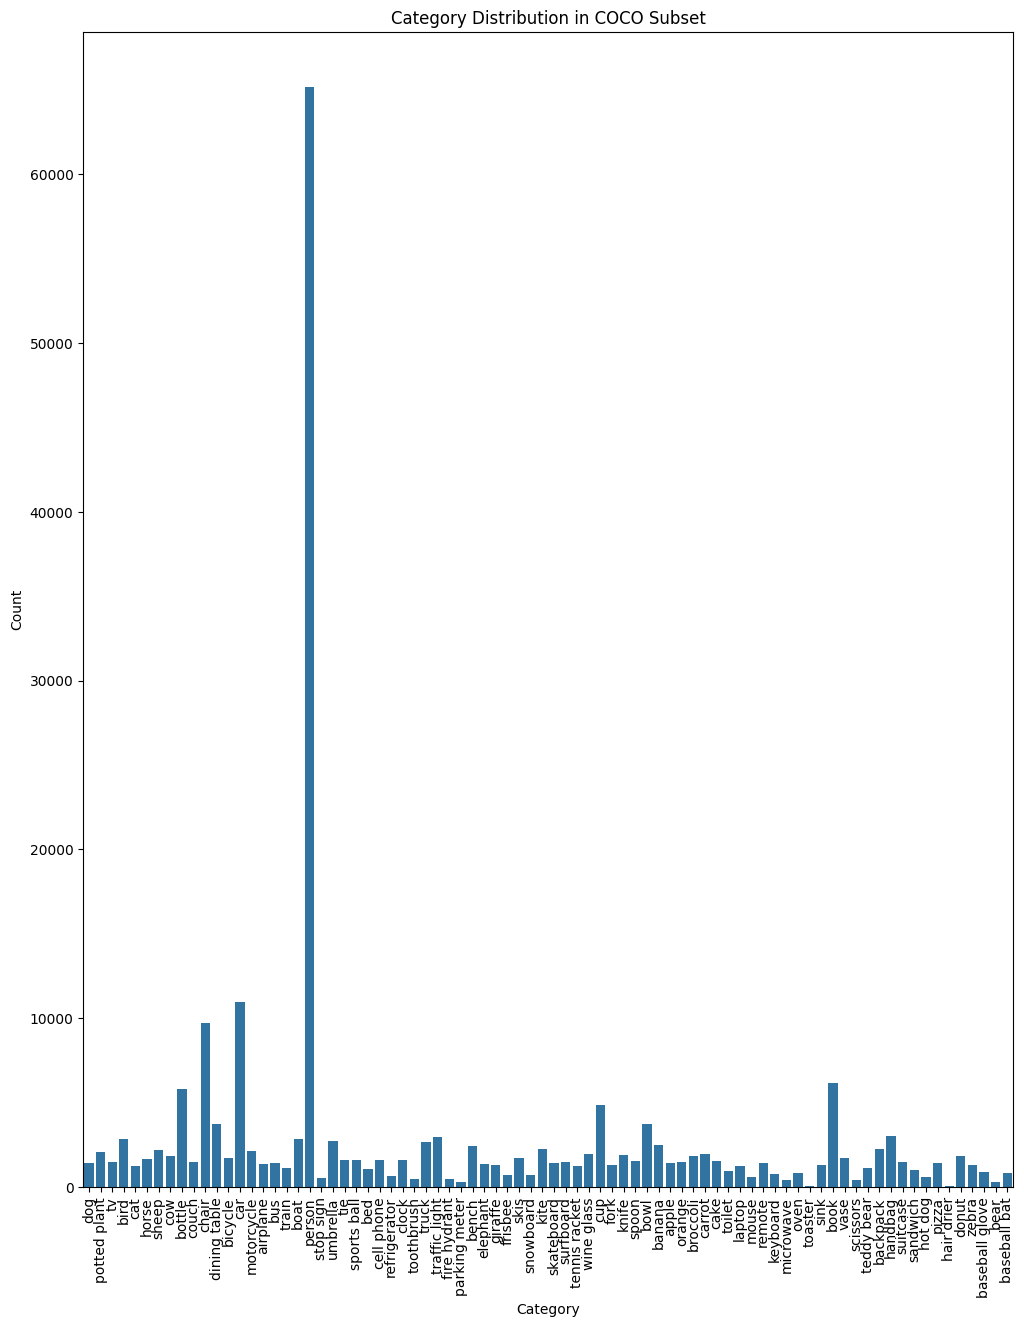

In [ ]:
#plotting category distribution
#Uses Seaborn to create a bar plot showing how many times each category appears in the dataset.
plt.figure(figsize=(12,15))
sns.barplot(x=[coco.cats[cat]['name'] for cat in category_counts.keys()],y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution in COCO Subset")
plt.show()

In [ ]:
#Number of objects or instances per image
image_counts={}
for ann in annotations:
  img_id=ann['image_id']
  image_counts[img_id]=image_counts.get(img_id,0)+1

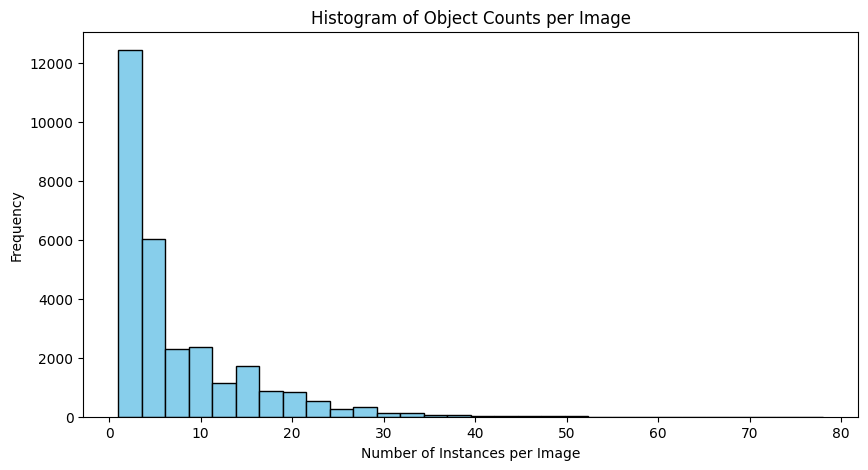

In [ ]:
#histogram for object count per image
plt.figure(figsize=(10,5))
plt.hist(image_counts.values(),bins=30,color='skyblue',edgecolor='black')
plt.xlabel("Number of Instances per Image")
plt.ylabel("Frequency")
plt.title("Histogram of Object Counts per Image")
plt.show()

In [ ]:
#Function to show a random image with annotations
def show_random_image():
  img_id=random.choice(images)['id']
  img_info=coco.loadImgs(img_id)[0]
  img_path=os.path.join(IMAGE_FOLDER,img_info['file_name'])
  image=cv2.imread(img_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  ann_ids=coco.getAnnIds(imgIds=img_id)
  anns=coco.loadAnns(ann_ids)
  coco.showAnns(anns)
  plt.title(f"ImageId:{img_id}")
  plt.show()

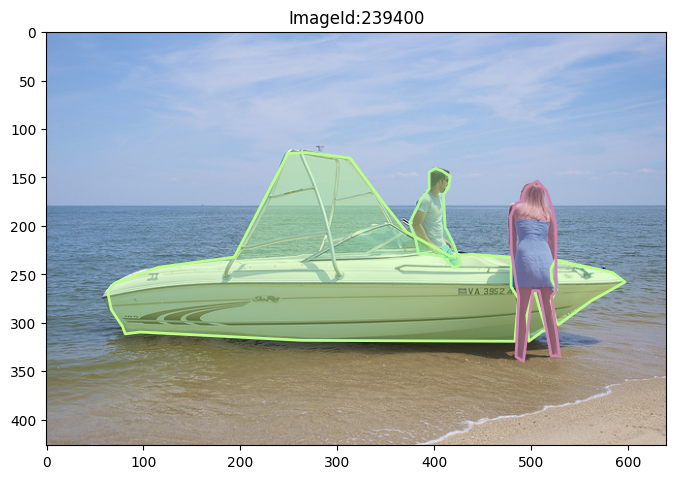

In [ ]:
#call to show random image
show_random_image()

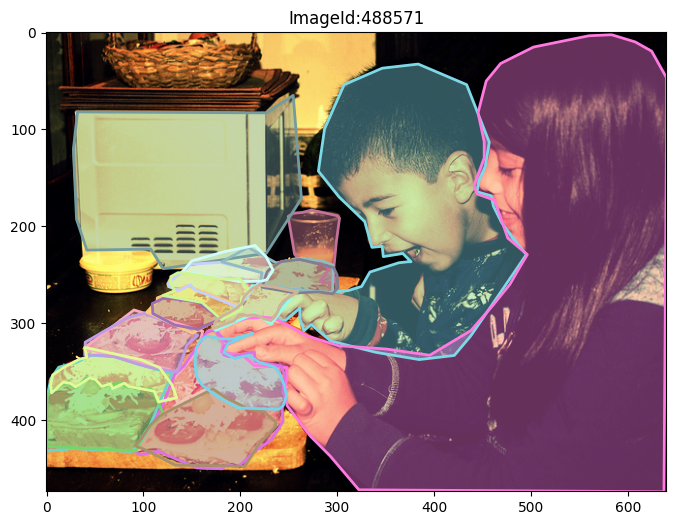

In [ ]:
#call to show random image
show_random_image()

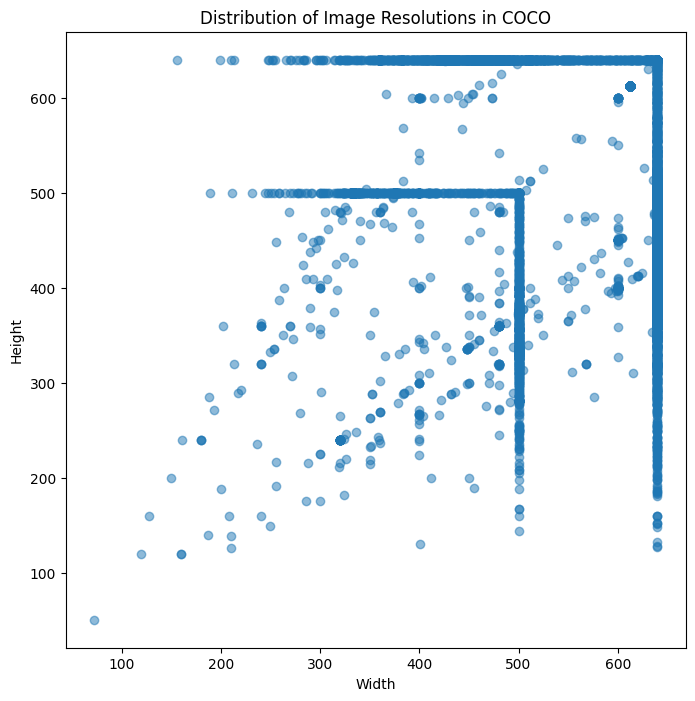

In [ ]:
# Extract image sizes
image_sizes = [(coco.imgs[img_id]['width'], coco.imgs[img_id]['height']) for img_id in coco.imgs]
widths, heights = zip(*image_sizes)
#unzips the list of tuples, separating the widths and heights into two lists.
# Scatter plot of width vs height
plt.figure(figsize=(8,8))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribution of Image Resolutions in COCO")
plt.show()


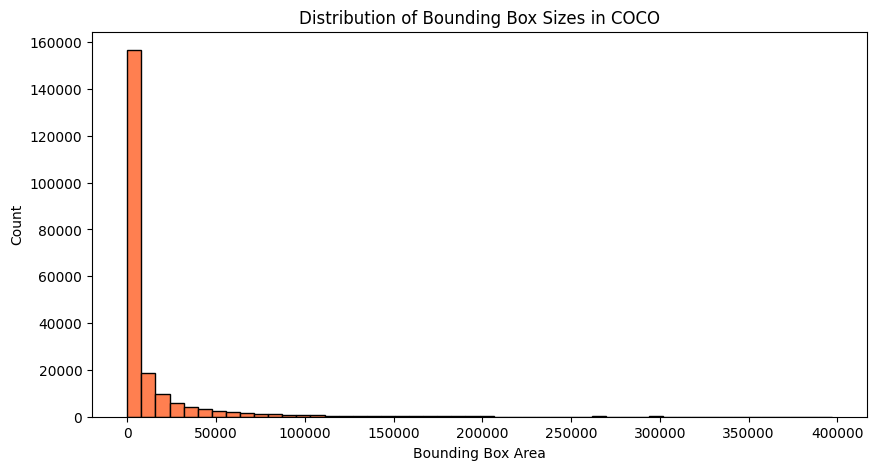

In [ ]:
# Extract bounding box sizes
bbox_areas = [ann['area'] for ann in coco.anns.values()]
# Histogram of bounding box areas
plt.figure(figsize=(10,5))
plt.hist(bbox_areas, bins=50, color='coral', edgecolor='black')
plt.xlabel("Bounding Box Area")
plt.ylabel("Count")
plt.title("Distribution of Bounding Box Sizes in COCO")
plt.show()

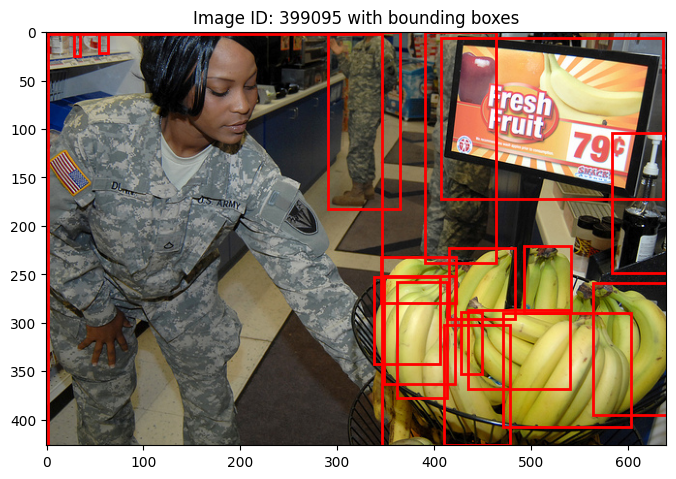

In [ ]:
#image with bounding boxes
from PIL import Image #opening, manipulating, and saving images in Python
import matplotlib.patches as patches #provides various shapes and geometric objects

# Select a random image
img_id = random.choice(list(coco.imgs.keys()))
img_info = coco.loadImgs(img_id)[0]
img_path = os.path.join(IMAGE_FOLDER,img_info['file_name'])

# Load image
image = Image.open(img_path)

# Get annotations
ann_ids = coco.getAnnIds(imgIds=img_id)
annotations = coco.loadAnns(ann_ids)

# Plot image
fig, ax = plt.subplots(1, figsize=(8,8)) #Creates a figure and axes for plotting.
ax.imshow(image) #Displays the image on the axes.

# Draw bounding boxes
for ann in annotations:
    bbox = ann['bbox']
    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='red', facecolor='none'
    )
ax.add_patch(rect)

plt.title(f"Image ID: {img_id} with bounding boxes")
plt.show()


# **Task:2 Preprocessing of the images**

In [3]:
#defining paths
extract_folder = "/content/extracted_files/coco2017_subset"
input_folder = os.path.join(extract_folder, "train2017")
output_folder = "/content/drive/MyDrive/coco2017_preprocessed"

In [4]:
#image processing function
def preprocess_image(img):
  #Resize the image
  img=cv2.resize(img,(256,256))
  #Normalize the pixel values to [0,1]
  img=img/255.0
  # Augmentation: Random horizontal flip
  if random.random() > 0.5:
      img = cv2.flip(img, 1)
  # Augmentation: Random brightness adjustment (factor 0.8 to 1.2)
  if random.random() > 0.5: #generates a random inumber between 0 and 1
      factor = 1.0 + (random.random() - 0.5) * 0.4
      img = np.clip(img * factor, 0, 1)
  return img

In [ ]:
for filename in os.listdir(input_folder):
  img_path=os.path.join(input_folder,filename)
  img=cv2.imread(img_path)
  if img is not None:
    img=preprocess_image(img)
    save_path=os.path.join(output_folder,filename)
    cv2.imwrite(save_path,(img*255).astype(np.uint8))

In [5]:
num_images = sum(1 for filename in os.listdir(output_folder) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')))
print(f"Number of images in the folder: {num_images}")

Number of images in the folder: 29571


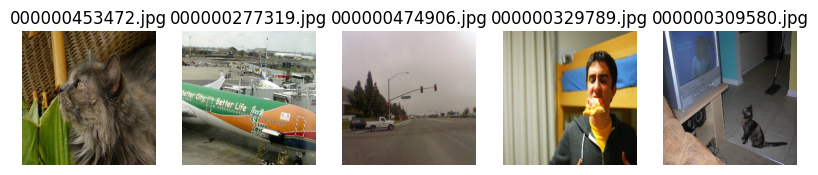

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Get list of image files
image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'))]

# Select a few random images
num_samples = min(5, len(image_files))  # Show up to 5 images
sample_files = random.sample(image_files, num_samples)

# Display images
plt.figure(figsize=(10, 5))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(output_folder, filename)
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(filename)

plt.show()
